In [4]:
%%capture
!pip install imgkit wkhtmltopdf
!wget https://github.com/wkhtmltopdf/packaging/releases/download/0.12.6-1/wkhtmltox_0.12.6-1.bionic_amd64.deb
!mv wkhtmltox_0.12.6-1.bionic_amd64.deb /usr/bin
!sudo apt install /usr/bin/wkhtmltox_0.12.6-1.bionic_amd64.deb
!rm -rf rescss_min.css NewLogo.jpg /tmp/Style /tmp/Images
!mkdir -p /tmp/Style
!mkdir -p /tmp/Images
!wget -O /tmp/Style/rescss_min.css https://www.gturesults.in/Style/rescss_min.css
!wget -O /tmp/Images/NewLogo.jpg https://www.gturesults.in/Images/NewLogo.jpg

In [5]:
import re
import io
import imgkit
import requests
from PIL import Image
from urllib.parse import quote
from multiprocessing import Pool
from IPython.display import display

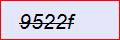

'ASP.NET_SessionId=gwpwlkyn3wodnwywk3iqa4up'

In [3]:
s = requests.Session()
url = "https://www.gturesults.in/Handler.ashx"
r = s.get(url)
display(Image.open(io.BytesIO(r.content)))
re.search(r'ASP.NET_SessionId=[^;]+', r.headers['Set-Cookie']).group()

In [6]:
c = "9522f"

In [7]:
exam = quote("3700$S2023$2023-06-17$current$0")

In [8]:
url = "https://www.gturesults.in/Default.aspx"

headers = {
    "Host": "www.gturesults.in",
    "Content-Length": "1288",
    "Cache-Control": "max-age=0",
    "Sec-Ch-Ua": "\"Not A(Brand\";v=\"24\", \"Chromium\";v=\"110\"",
    "Sec-Ch-Ua-Mobile": "?0",
    "Sec-Ch-Ua-Platform": "\"Windows\"",
    "Upgrade-Insecure-Requests": "1",
    "Origin": "https://www.gturesults.in",
    "Content-Type": "application/x-www-form-urlencoded",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.5481.78 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "Sec-Fetch-Site": "same-origin",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-User": "?1",
    "Sec-Fetch-Dest": "document",
    "Referer": "https://www.gturesults.in/Default.aspx?ext=S2023",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Cookie": re.search(r'ASP.NET_SessionId=[^;]+', r.headers['Set-Cookie']).group()
}

querystring = {"ext":"S2023"}

kitoptions = {
  "enable-local-file-access": None ,
}

In [9]:
!rm -rf op
!mkdir op

In [10]:
def vtodur(enr):
    try:
        payload = f"__EVENTTARGET=&__EVENTARGUMENT=&__VIEWSTATE=%2FwEPDwUKLTQ2MTAzMzcxNQ9kFgICAw9kFgwCAQ8WAh4EVGV4dAWTASA8YSBzdHlsZT0iY29sb3I6IGdyYXk7IGZvbnQtc2l6ZTogMTBweDsiIGhyZWY9IkRlZmF1bHQuYXNweD9leHQ9Q3VycmVudCI%2BQXJjaGl2ZTwvYT4gIHwgQ3VycmVudCA8c3BhbiBzdHlsZT0iY29sb3I6IG1hcm9vbjsiPiBbU3VtbWVyIDIwMjNdPC9zcGFuPmQCAw8PFgIeB1Zpc2libGVoZGQCBQ8WAh8BaGQCBw8PFgIfAAULU3VtbWVyIDIwMjNkZAIJDxBkZBYAZAILDxAPFgYeDkRhdGFHcm91cEZpZWxkBQZCUkFOQ0geDURhdGFUZXh0RmllbGQFBUVYQU1OHg5EYXRhVmFsdWVGaWVsZAUGRVhBTUlEZDKOAwABAAAA%2F%2F%2F%2F%2FwEAAAAAAAAADAIAAABBT3B0aW9uQ3RybCwgVmVyc2lvbj0xLjAuMC4wLCBDdWx0dXJlPW5ldXRyYWwsIFB1YmxpY0tleVRva2VuPW51bGwFAQAAAB5WaWtTZXJ2ZXJDb250cm9sLk9wdGlvblRyaXBsZXQEAAAABUZpcnN0BlNlY29uZAVUaGlyZAZGb3VydGgCAgICAgAAAAgIAgAAAAkDAAAACQQAAAAJBQAAABEDAAAAAgAAAAYGAAAAKi4uLi4uQkUgU0VNIDggLSBSZWd1bGFyIChNQVkgMjAyMykgcGhhc2UgSQYHAAAAKy4uLi4uQkUgU0VNIDggLSBSZWd1bGFyIChNQVkgMjAyMykgcGhhc2UgSUkRBAAAAAIAAAAGCAAAAB8zNzAwJFMyMDIzJDIwMjMtMDYtMTckY3VycmVudCQwBgkAAAAfMzcwMSRTMjAyMyQyMDIzLTA2LTE3JGN1cnJlbnQkMBEFAAAAAgAAAAYKAAAAAkJFBgsAAAACQkULZGQYAQUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFgEFBmltZ3JlZn1X4UxNJryqAa0VagzmtpRJC3Bc32emV1Z%2BlPrqflng&__VIEWSTATEGENERATOR=CA0B0334&ddlbatch={exam}&txtenroll={enr}&txtSheetNo=&CodeNumberTextBox={c}&btnSearch=Search"

        imgkit.from_string(requests.request("POST", url, data=payload, headers=headers, params=querystring).text,f'/content/op/{enr}.jpg',options=kitoptions)
    except OSError as e:
        pass

with Pool(5) as pp:
  pp.map(vtodur,range(190280111001,190280111160))

In [11]:
%%capture
!zip -r op.zip op

👈 download <font color='yellow'>op.zip</font> from left side bar by double clicking it